bias =  -0.012312614170479384
rmse =  0.3052998805226949


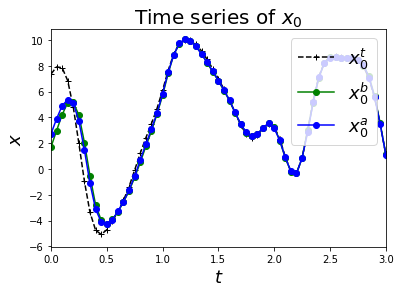

bias =  0.02017402709568639
rmse =  0.3199693319185032


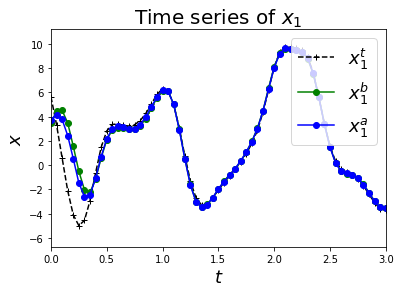

bias =  0.04967964562720917
rmse =  0.34039622335272257


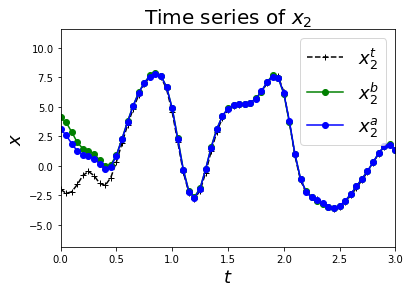

bias =  -0.0009345917676064995
rmse =  0.13935667367724916


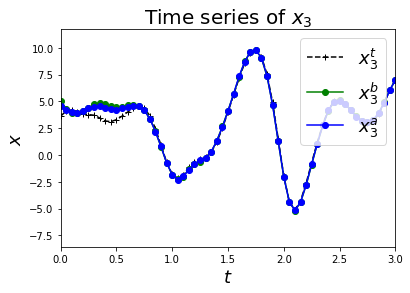

bias =  -0.021903518063320443
rmse =  0.22110006526502332


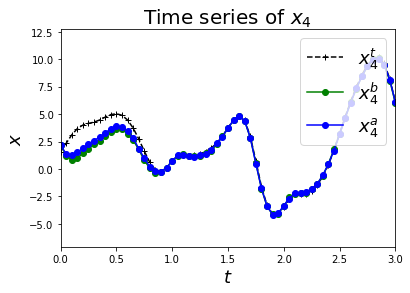

bias =  0.0025563820310688505
rmse =  0.16385246205187884


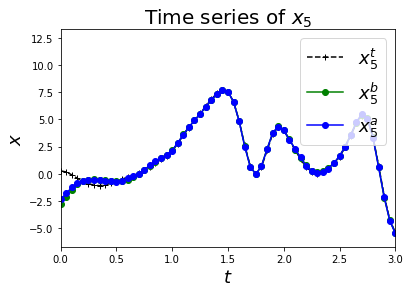

bias =  0.007647524820019861
rmse =  0.1451949508165205


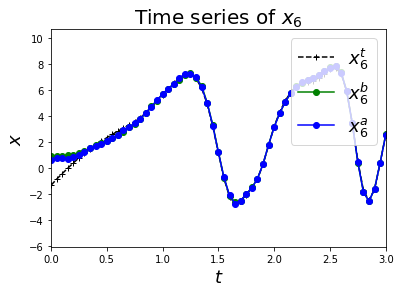

bias =  -0.014230515669365486
rmse =  0.10987085610415927


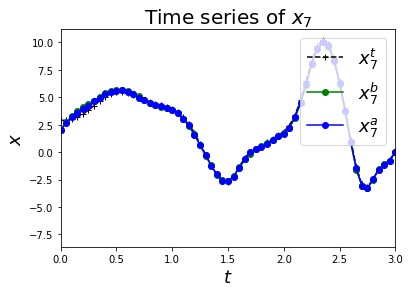

bias =  0.024302516456306527
rmse =  0.22463242431086708


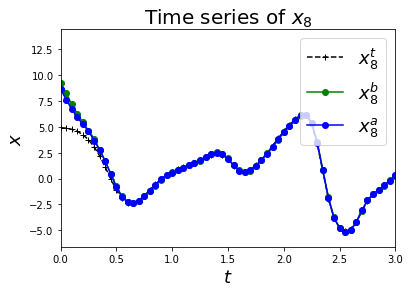

bias =  -0.00011481482961590495
rmse =  0.12552281885538696


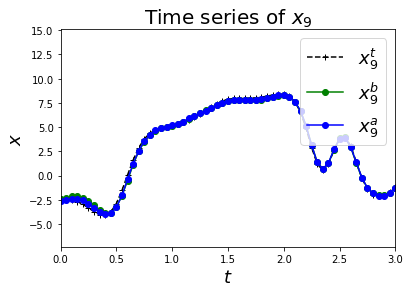

bias =  0.03337788811236487
rmse =  0.25593859892771237


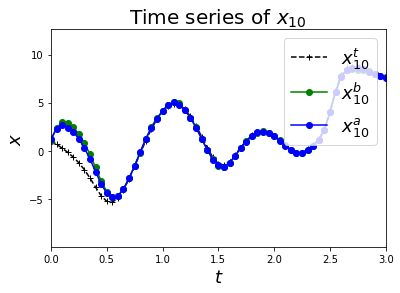

bias =  -0.03747006411920396
rmse =  0.5080554021183352


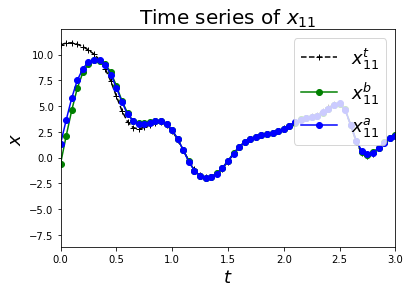

bias =  -0.00952389051746782
rmse =  0.22218288746116327


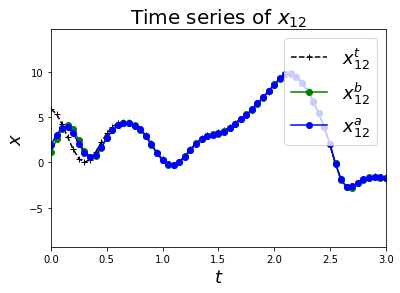

bias =  0.03876682074478595
rmse =  0.42806842458325345


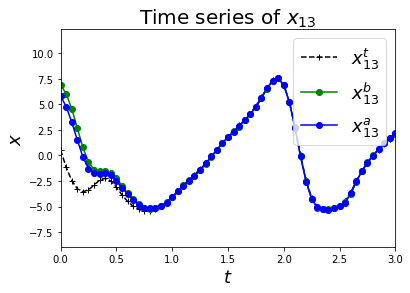

bias =  0.007956315129461516
rmse =  0.2184726361128693


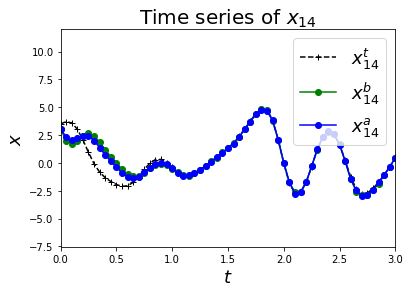

bias =  -0.058002037053386434
rmse =  0.607909614366583


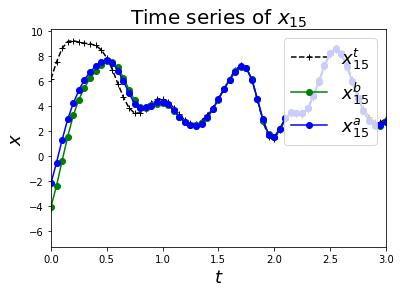

bias =  -0.014113232527326618
rmse =  0.44372168670529016


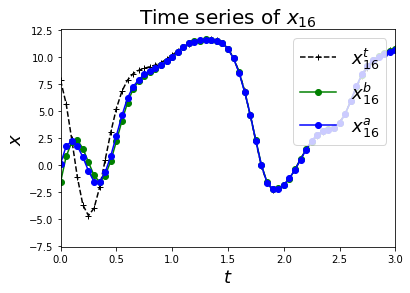

bias =  0.00970646023070829
rmse =  0.2961211717219009


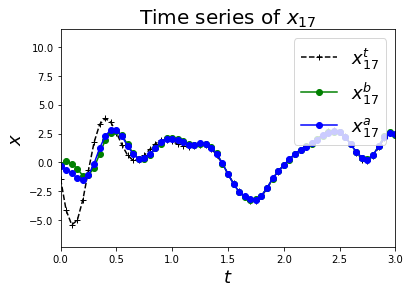

bias =  0.003602629226090497
rmse =  0.2039899346320465


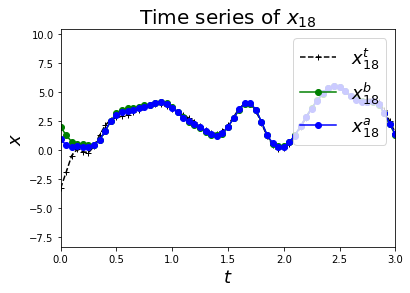

bias =  0.04442009131491982
rmse =  0.4097655094293162


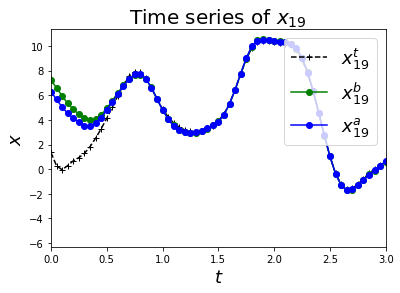

bias =  -0.027780514486671164
rmse =  0.2544989137562456


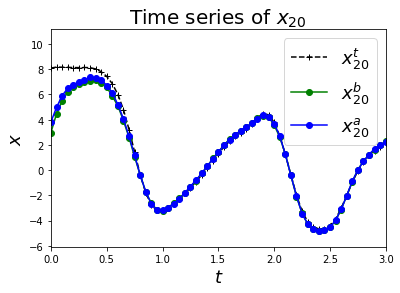

bias =  0.0031146063319492222
rmse =  0.20933372247104862


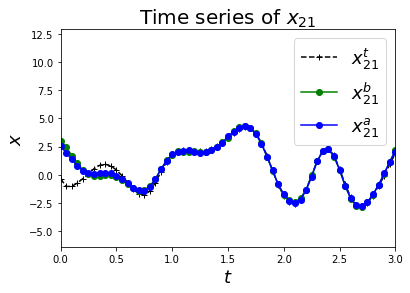

bias =  0.03303422689239562
rmse =  0.3699687178983307


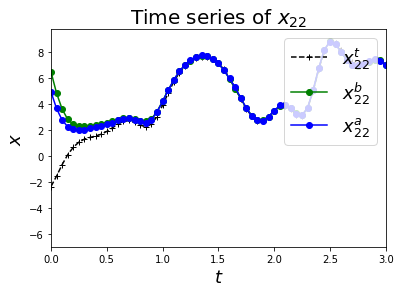

bias =  0.02763197751873536
rmse =  0.2328861004623461


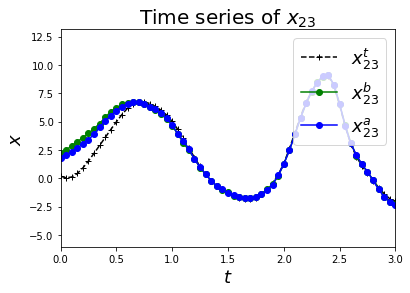

bias =  -0.00041724741420892094
rmse =  0.1645756878947529


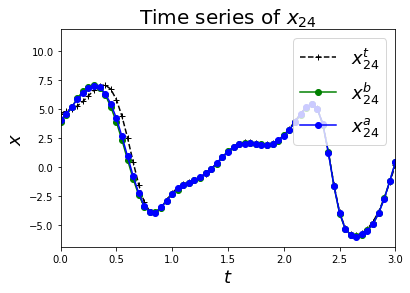

bias =  -0.02823193028700044
rmse =  0.2629071185543887


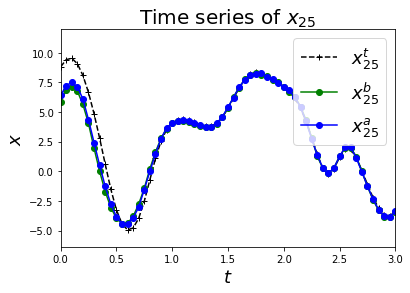

bias =  0.027544582734945186
rmse =  0.13741887171069406


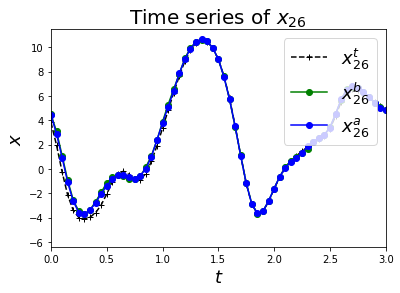

bias =  -0.00890904481153109
rmse =  0.16102077065027082


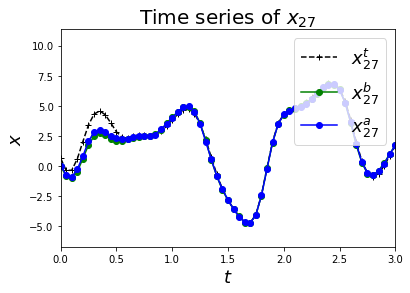

bias =  -0.0004448957990159278
rmse =  0.10418730769327816


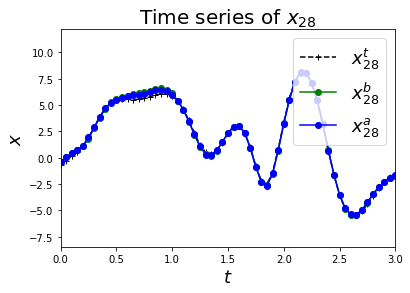

bias =  0.04963804149562528
rmse =  0.3227066360889949


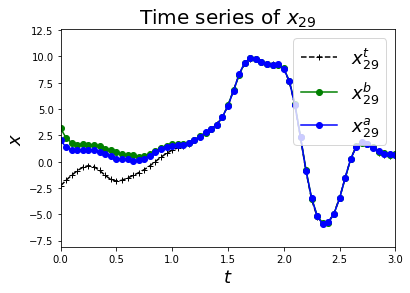

bias =  0.0738264141055444
rmse =  0.5839193451028677


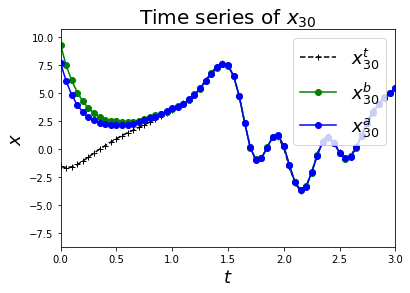

bias =  -0.04933698046552832
rmse =  0.4338503038765017


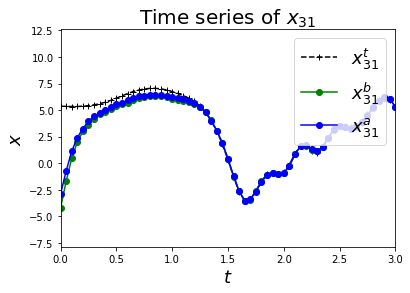

bias =  0.016161155317316333
rmse =  0.2602636479944632


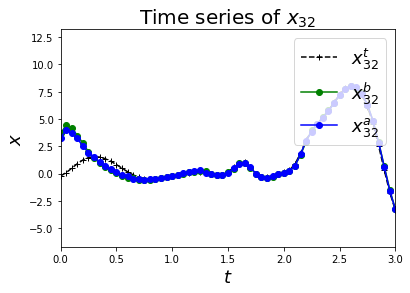

bias =  0.022901238501130433
rmse =  0.13059391040753338


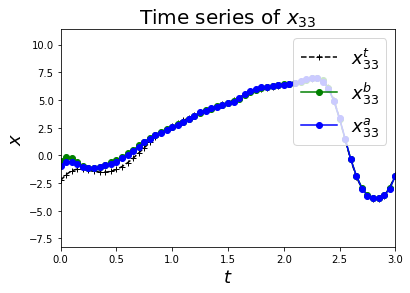

bias =  0.03490789498861782
rmse =  0.24665160204673708


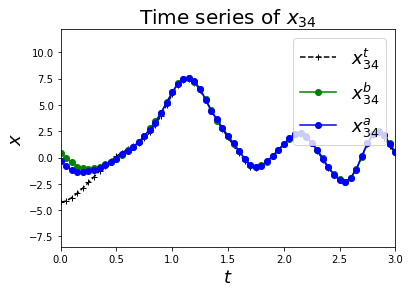

bias =  0.03879944768608877
rmse =  0.35884124889456465


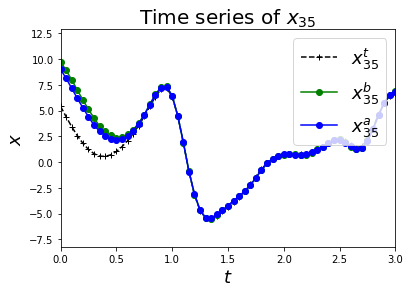

bias =  -0.015945132705196065
rmse =  0.16192222714309087


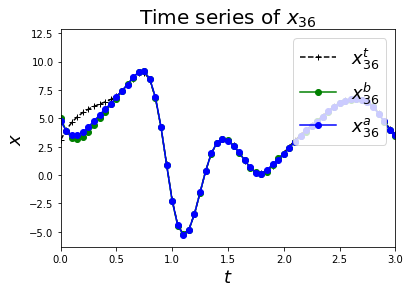

bias =  -0.022148801545341854
rmse =  0.22927251289675532


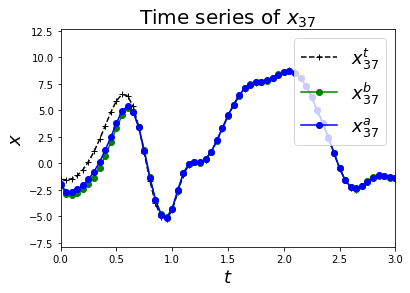

bias =  0.014838365773316771
rmse =  0.13906322091480078


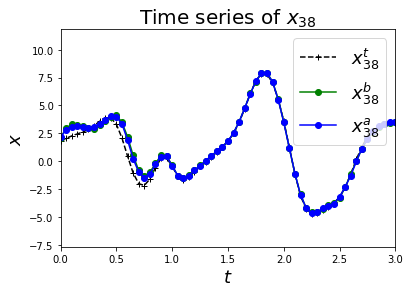

bias =  -0.017220847583551864
rmse =  0.26954441955226804


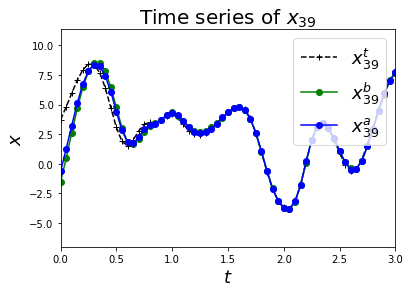

In [82]:
"""
Plot the data assimilation results
Read:
  x_t.txt
  x_b.txt
  x_a.txt
"""
import numpy as np
from settings import *
import matplotlib.pyplot as plt
N = 40

# load data
x_t_save = np.genfromtxt('x_t.txt')
x_b_save = np.genfromtxt('x_b.txt')
x_a_save = np.genfromtxt('x_a.txt')


# Plot time series of a single grid point
bias_v = []
rmse_v = []

for i in range(N):
    pt = i
    plt.figure()
    #print(x_a_save[:,pt-1])
    #print(x_b_save[:,pt-1])
    
    plt.plot(np.arange(nT+1) * dT, x_t_save[:,pt-1], 'k+--', label=r'$x^t_{' + str(pt) + '}$')
    plt.plot(np.arange(nT+1) * dT, x_b_save[:,pt-1], 'go-' , label=r'$x^b_{' + str(pt) + '}$')
    plt.plot(np.arange(nT+1) * dT, x_a_save[:,pt-1], 'bo-' , label=r'$x^a_{' + str(pt) + '}$')
    bias_i = (x_a_save[:,pt-1]-x_t_save[:,pt-1]).mean()
    print("bias = ", bias_i)
    rmse_i = np.std(x_a_save[:,pt-1]-x_t_save[:,pt-1])
    print("rmse = ", rmse_i)
    bias_v.append(bias_i)
    rmse_v.append(rmse_i)
    
    
    plt.xlabel(r'$t$', size=18)
    plt.ylabel(r'$x$', size=18)
    plt.xlim(0,3)
    plt.title(r'Time series of $x_{' + str(pt) + '}$', size=20)
    plt.legend(loc='upper right', numpoints=1, prop={'size':18})
    #plt.savefig('timeseries.png', dpi=200)
    plt.show()
    plt.close()

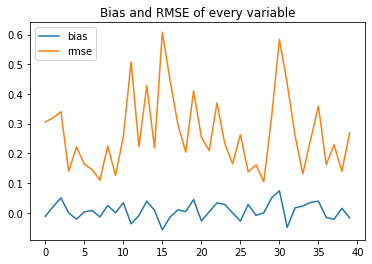

In [83]:
#per variable
#print(bias)
#print(rmse)
plt.plot(np.arange(N),bias_v, label="bias")
plt.plot(np.arange(N),rmse_v, label="rmse")
plt.legend(loc="upper left")
plt.title("Bias and RMSE of every variable")
plt.show()

In [84]:
analysis_error = x_a_save-x_t_save
bias_t = []
rmse_t = []
for i in range(nT):
    
    bias_i = analysis_error[i][:].mean()
    rmse_i = np.std(analysis_error[i][:])
    bias_t = np.append(bias_t, bias_i)
    rmse_t = np.append(rmse_t, rmse_i)

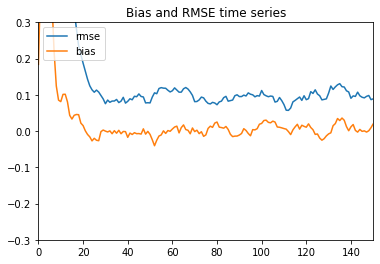

In [85]:
plt.plot(rmse_t, label ="rmse" )
plt.plot(bias_t, label = "bias")
plt.ylim(-0.3,0.3)
plt.xlim(0,150)
plt.legend(loc="upper left")
plt.title("Bias and RMSE time series")
plt.show()

In [86]:
rmse = rmse_t[30:800].mean()
bias = bias_t[30:800].mean()
print(rmse)

0.09814419081785357
